# A 1D Diffusion Model

C is going to be the concentration, x will be the spatial  dimension
This is going to be a one dimensional model (think a graph with only x-y axes)

Here we develop a one-dimensional model of diffusion.
It assumes a constant diffusivity.
It uses a regular grid.
It has fixed boundary conditions.

The diffusion equation:

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$

The discretized version of the diffusion equation that we'll solve with our model:

$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the explicit FTCS scheme as described in Slingerland and Kump (2011). (Or see Wikipedia.)

We will use two libraries, Numpy (for arrays) and Matplotlib (for plotting) that aren't a part of the base Python distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Set two fixed model parameters, the diffusivity and the size of the model domain.

In [2]:
D = 100
Lx = 300

D is diffusivity, Lx is the size of the model domain

Next, set up the model grid using a NumPy array.

In [3]:
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)

In [4]:
whos

Variable   Type       Data/Info
-------------------------------
D          int        100
Lx         int        300
dx         float      0.5
np         module     <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
nx         int        600
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
x          ndarray    600: 600 elems, type `float64`, 4800 bytes


dx is the grid spacing (x axis is spaced out in 0.5 units).

"arange" is array range -- arange makes an array based on the given range (start at 0, stop at Lx [300], with a step of dx [0.5].

"len" is the length function -- it gives a count of the number of items in x (the created array).

nx is the number of elements within our array "x".

In [6]:
x[0]

np.float64(0.0)

In [7]:
x[nx-1]

np.float64(299.5)

In [8]:
x[0:5]

array([0. , 0.5, 1. , 1.5, 2. ])

Set the initial concentration profile for the model.
The concentration `C` is a step function with a high value on the left, and a low value on the right, and the step at the center of the domain.

In [10]:
C = np.zeros_like(x)
C_left = 500
C_right = 0
C[x <= Lx//2] = C_left
C[x > Lx//2] = C_right

"zeros" function makes an array of 0s.

"zeros_like" function makes an array similar to another -- in this case ther are 600 elements that are all 0.

On the left side of the function (the plot), C will have a value of 500. On the right side of the function, C will have a value of 0.

For values of x that are less than or equal to half the domain size, C will have a value of 500.

For values of x that are greater than half the domain size, C will have a value of 0.

In [11]:
C[0:5]

array([500., 500., 500., 500., 500.])

Plot the initial profile

Text(0.5, 1.0, 'Initial Concentration Profile')

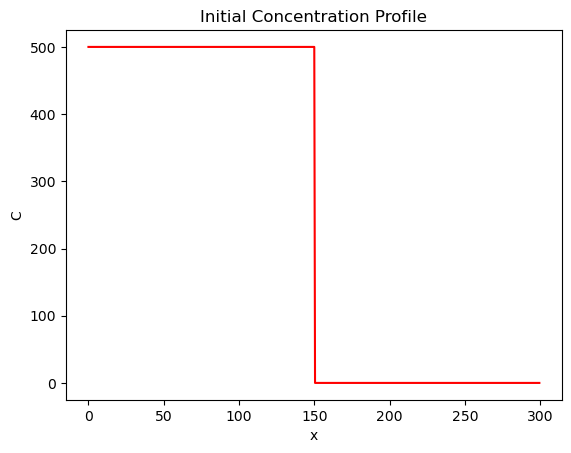

In [15]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial Concentration Profile")

Set the start time of the model and the number of time steps.

Calculate a stable time step for the model using a stability criterion.

In [16]:
time = 0
nt = 5000
dt = 0.5 * dx**2 / D

** Is a power -- dx**2 = dx^2

nt is the number of steps or iterations of time.

In [17]:
dt

0.00125

Loop over the time steps of the model, solving the diffusion equation using the FTCS explicit scheme described above.

The boundary conditions are fixed, so reset them at each time step.

In [18]:
for t in range(0, nt):
    C += D * dt / dx**2 * (np.roll(C, -1) - 2*C + np.roll(C, 1))
    C[0] = C_left
    C[-1] = C_right

"for" function is used to execute loops a set number of times.

"t" is our loop counter.

"+=" operator adds a value to the object and changes the object to have a new value -- C will become the initial value of C plus the expression.

"np.roll" function shifts by 1 -- the current expression creates a loop in the timeline, so the following two expressions resolve the end caps.

Plot the result.

Text(0.5, 1.0, 'Final Concentration Profile')

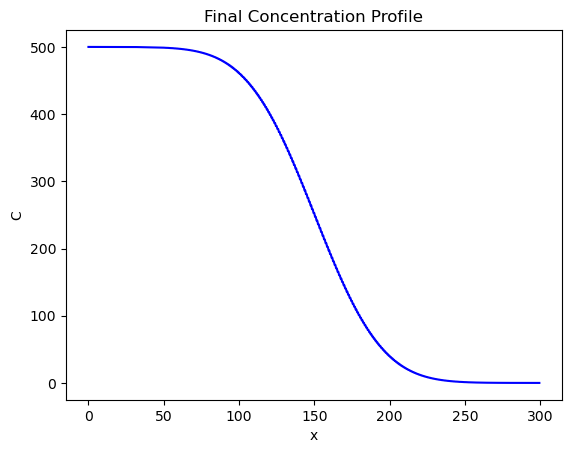

In [19]:
plt.figure()
plt.plot(x, C, "b")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final Concentration Profile")

An example of how "n.roll" works:

In [21]:
z = np.arange(5)
z

array([0, 1, 2, 3, 4])

In [22]:
np.roll(z,-1)

array([1, 2, 3, 4, 0])

In [23]:
np.roll(z,1)

array([4, 0, 1, 2, 3])